# 1. BUSINESS UNDERSTANDING

Business Understanding yang merupakan tahap dimana Business problem didefinisikan dengan sederhana dan tepat. Meskipun terkesan sederhana pada hakikatnya tahapan ini memerlukan penguasaan pada dua bagian yang berbeda yaitu pemahaman terhadap business process termasuk regulasi yang mengaturnya dan pemahaman terhadap cara pengolahannya.

Dalam manusia terdapat beberapa kandungan salah satunya yaitu kandungan lemak tubuh. tubuh penumpukan lemak biasanya diakibatkan dari pola makan dan pola olahraga, seseorang dapat diketahui lemak tubuhnya dengan cara melihat atau mengukur bagian-bagian tubuh, berat badan dan kepadatan dari mass ototnya. Disini terdapar data yang akan digunakan untuk mengetahui lemak yang ada didalam tubuh. Melalui model ini dapat mengetahui kandungan lemak yang ada dalam tubuh dengan mengambil data-data seperti: kepadatan massa otot, umur, berat badan dan tinggi badan

Data ini diambil dari https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset yang bersumber dari oleh Dr. A. Garth Fisher yang memberikan izin untuk mendistribusikan data secara bebas dan menggunakannya untuk tujuan non-komersial.



# 2. DATA UNDERSTANDING

Data understanding adalah sebuah tahapan di dalam metodologi sains data dan pengembangan AI yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan bisnis yang diberikan.

Tabel di bawah menunjukkan data keterangan mengenai ukuran bagian-bagian tubuh manusia seperti 
1. Kepadatan massa otot
2. Persen lemak tubuh
3. Umur (tahun)
4. Berat (lbs)
5. Tinggi (inchi)
6. Lingkar leher (cm)
7. Lingkar dada (cm)
8. Lingkar perut 2 (cm)
9. Lingkar Pinggul (cm)
10. Lingkar paha (cm)
11. Lingkar lutut (cm)
12. Lingkar pergelangan kaki (cm)
13. Bisep (diperpanjang) lingkar (cm)
14. Lingkar lengan bawah (cm)
15. Lingkar pergelangan tangan (cm)

Dari data tersebut akan diambil Kepadatan massa otot, Umur (tahun), Berat (pon), Tinggi (inchi), Lingkar leher (cm),Lingkar dada (cm), Lingkar perut 2 (cm), Lingkar Pinggul (cm), Lingkar paha (cm), Lingkar lutut (cm). Lingkar pergelangan kaki (cm), Bisep (diperpanjang) lingkar (cm), Lingkar lengan bawah (cm), Lingkar pergelangan tangan (cm)akan menjadi inputan dalam model dan persen lemak tubuh sebagai nilai estimasinya.
 

## Library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memanggil dataset

In [2]:
df = pd.read_csv('bodyfat.csv')

## Deskripsi dataset

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# 3. DATA PREPARATION
Disini inputan yg dimasukan adalah year,Small_Bags,Large_Bags,Xlarge_Bags dengan nilai akhir estimasinya yaitu AveragePrice.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


## Mencari heatmap

<Axes: >

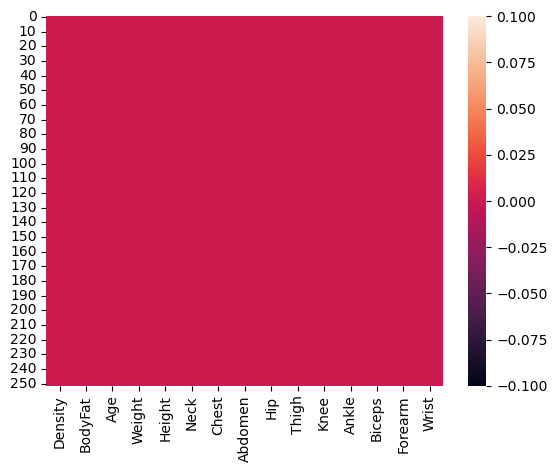

In [6]:
sns.heatmap(df.isnull())

## Melihat Nilai Data

In [7]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


## Visualisasi Data

<Axes: >

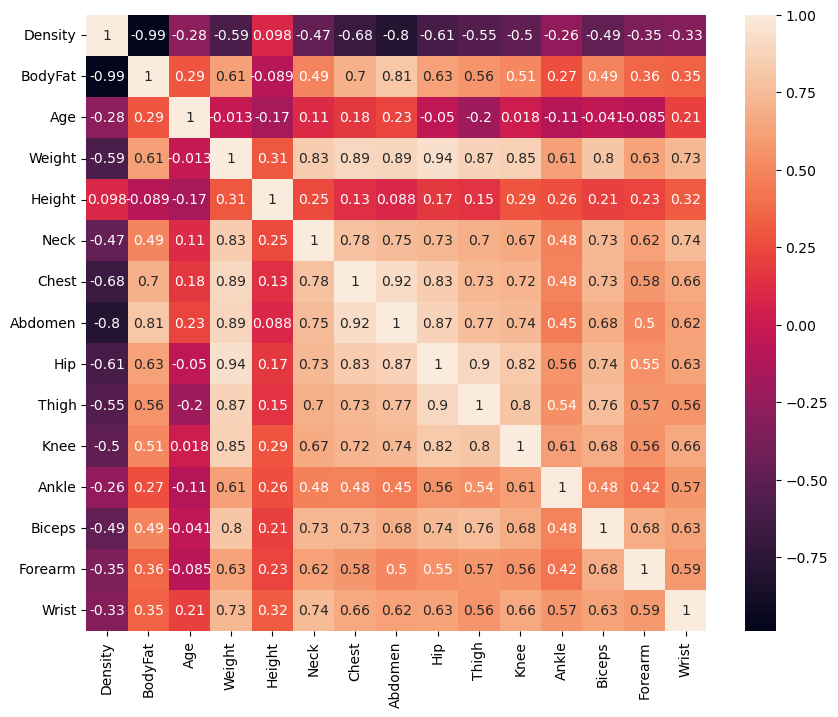

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Jumlah berat badan Berdasarkan kandungan lemak tubuh

In [10]:
models = df.groupby('Weight').count()[['BodyFat']].sort_values(by='BodyFat', ascending=True).reset_index()
models = models.rename(columns={'BodyFat':'weightOfFat'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

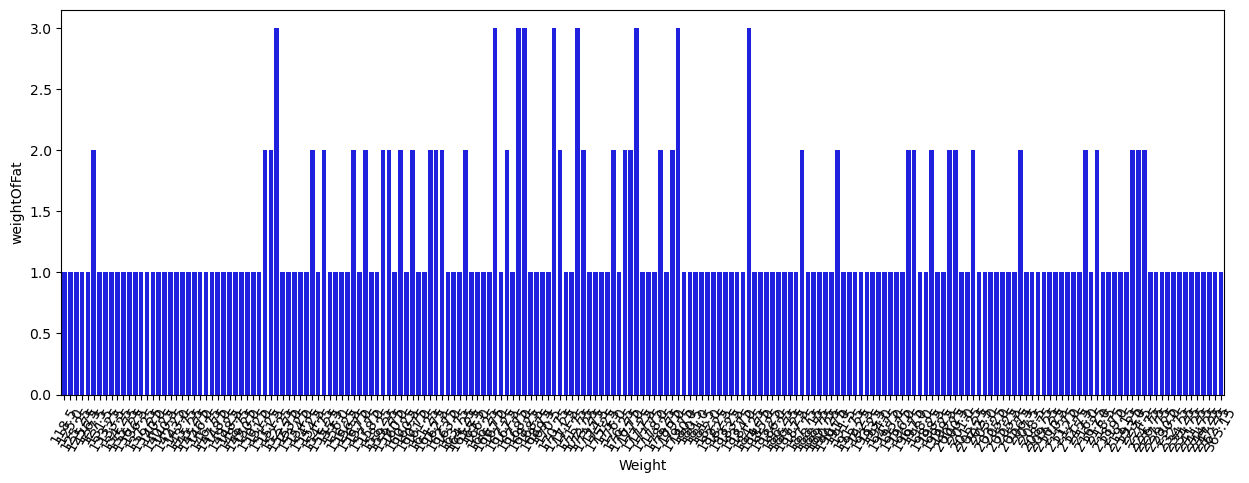

In [11]:
fig = plt.figure(figsize = (15,5))
sns.barplot(x = models['Weight'], y = models['weightOfFat'], color = 'blue')
plt.xticks(rotation = 60)

# 4. MODELLING DATA
Secara garis besar untuk membuat model prediktif atau deskriptif. Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Model yang digunakan sendiri yaitu Estimasi dengan metode regresi linear

## Seleksi Fitur

In [13]:
fitur = ['Density','Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']
x = df[fitur]
y = df['BodyFat']
x.shape, y.shape

((252, 14), (252,))

## Split Data Training & Testing

In [14]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 70)
y_test.shape

(63,)

## membuat regresi linier

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# 5. EVALUTION DATA


In [16]:
y = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', y)

Akurasi Model Regresi Linier :  0.9909700768437059


## Membuat inputan regresi linier

In [17]:
inputan = np.array([[1.0853, 22, 173.25, 72.25, 38.5, 93.6, 83.0, 98.7, 58.7, 37.3, 23.4, 30.5, 28.9, 18.2]])
prediksi = lr.predict(inputan)
print('Estimasi Lemak Dalam Tubuh : ', prediksi)

Estimasi Lemak Dalam Tubuh :  [6.24589122]


c:\Users\deden\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 6. DEPLOYMENT

## Save Model

In [18]:
import pickle
filename = 'estimasi_lemak.sav'
pickle.dump(lr,open(filename,'wb'))